# Punto 3

Sea $X_i$ con $i = 1, ... , 5$ una variable aleatoria de Bernoulli con media $E[X_i] = 0.3$. Estas variables son independientes. Sea $X =\sum_{i=1}^{5}X_i$.

Calcule $E[X_2|X=2]$.

Tenga en cuenta que $X$ es una variable aleatoria binomial, y que $\{X_2 = 1\}$ se puede ver como un evento independiente al evento $\{X_1 + X_3 + X_4 + X_5 = 1\}$ (lo cual podría ser útil para calcular $P(X_2=1 \cap X = 2)$).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Función de combinatoria porque math.comb solo sirve para Pyhton 3.8 o mayor y Colab usa Python 3.6.9.
def nCr(n, r):
    return math.factorial(n)/(math.factorial(r)*math.factorial(n-r))

Se sabe que $X$ sigue una distribución binomial, ya que $X$ corresponde a una suma de variables aleatorias de Bernoulli. 

Se parte de que 

$$E[X_2|X=2] = (0)p_{X_2|X=2}(0) + (1)p_{X_2|X=2}(1)$$
$$E[X_2|X=2] = p_{X_2|X=2}(1)$$

luego

$$p_{X_2|X=2}(1) = \frac{P(X_2 = 1 \cap X = 2)}{P(X=2)}$$

Aquí, se puede notar que decir que $X_2 = 1$ y que $X = 2$ sucedan al tiempo es equivalente a decir que 

$$X_1 + X_3 + X_4 + X_5 = 1$$

pues si reemplazamos $X_2 = 1$ en $X_1 + X_2 + X_3 + X_4 + X_5 = 2$ y despejamos, llegamos a que

$$X_1 + X_3 + X_4 + X_5 = 1$$

Entonces, se puede afirmar que

$$P(X_2 = 1 \cap X = 2) = P(X_2 = 1 \cap X_1 + X_3 + X_4 + X_5 = 1)$$

y luego

$$p_{X_2|X=2}(1) = \frac{P(X_2 = 1 \cap X_1 + X_3 + X_4 + X_5 = 1)}{P(X=2)}$$

Como se sabe que estos dos eventos son independientes (lo dice el enunciado), lo anterior es equivalente a 

$$p_{X_2|X=2}(1) = \frac{P(X_2 = 1) P(X_1 + X_3 + X_4 + X_5 = 1)}{P(X=2)}$$

De aquí ya se procede a calcular cada probabilidad y a evaluar la expresión.

$$P(X_2=1) = 0.3$$
$$P(X_1 + X_3 + X_4 + X_5 = 1) = {4 \choose 1} (0.3)^1(0.7)^3$$
$$P(X = 2) = {5 \choose 2} (0.3)^2(0.7)^3$$


In [3]:
pX2_1 = 0.3
pX1X5 = (nCr(4,1))*0.3*0.7**3
pX_2 = (nCr(5,2))*(0.3**2)*(0.7)**3

EX2dadoX = (pX2_1*pX1X5)/(pX_2)
print(np.round(EX2dadoX, 4))

0.4


Por lo tanto,

$$E[X_2|X=2] = p_{X_2|X=2}(1) = 0.4 = \frac{2}{5}$$

## a)

Grafique las funciones de masa de probabilidad para las variables aleatorias Bernoulli, Binomiales, Geométrica, y Poisson para diferentes valores de los parámetros correspondientes. No puede utilizar funciones predeterminadas para graficar cada una de estas funciones.

In [4]:
# Variable Aleatoria Bernoulli
def bern(x, p):
    resp = []
    for i in range(len(x)):
        if x[i] == 1:
            resp.append(p)
        else:
            resp.append(1-p)
    
    return resp

# Variable Aleatoria Binomial
def binom(n, k, p):
    resp = []
    for i in range(len(k)):
        resp.append(nCr(n,i)*(p**i)*((1-p)**(n-i)))
    return resp

# Variable Aleatoria Geométrica
def geom(p, x):
    return p*(1-p)**x

# Variable Aleatoria Poisson
def poisson(l, k):
    resp = []
    for i in range(len(k)):
        resp.append(np.exp(-l)*(l**i)/(math.factorial(i)))
    return resp

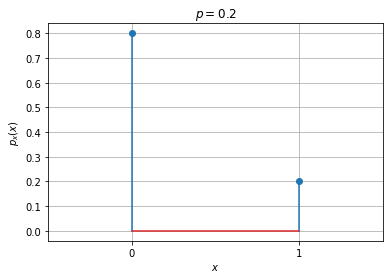

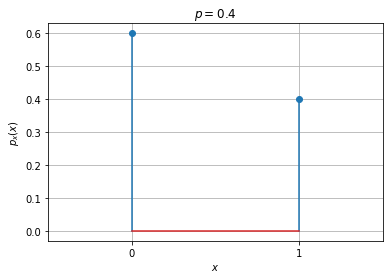

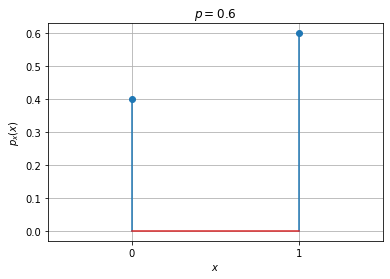

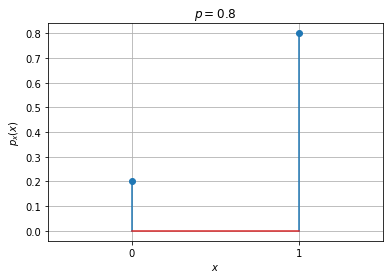

<Figure size 432x288 with 0 Axes>

In [5]:
# Gráfica de la variable aleatoria Bernoulli
step = 1
x_bern = np.arange(0, 2, step)
probs = [0.2, 0.4, 0.6, 0.8]

for p in probs:
    plt.stem(x_bern, bern(x_bern, p))
    plt.grid()
    plt.title(r'$p = $' + f'{p}')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p_x(x)$')
    plt.xticks([0,1])
    plt.xlim([-0.5,1.5])
    plt.figure()

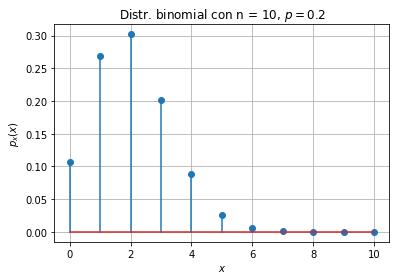

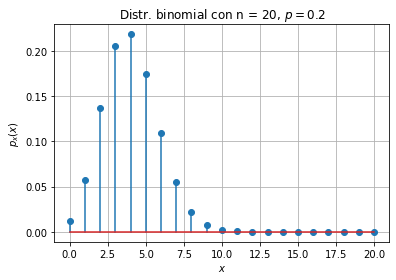

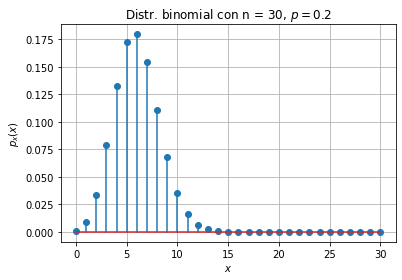

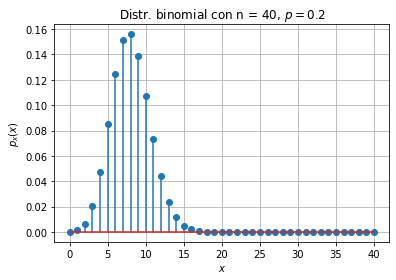

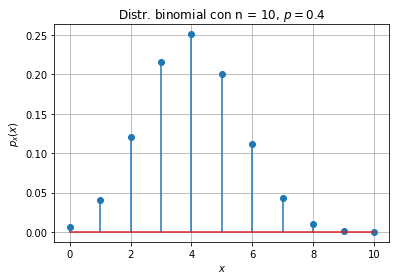

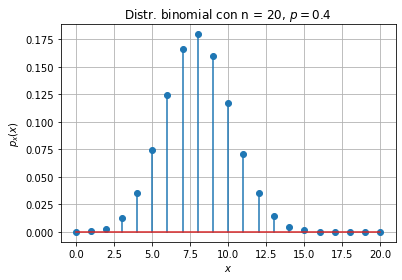

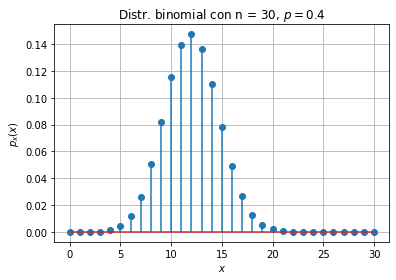

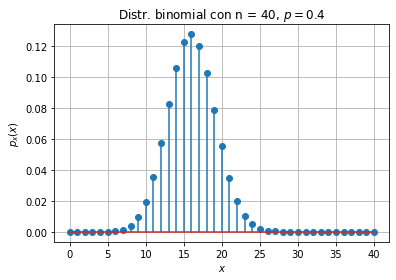

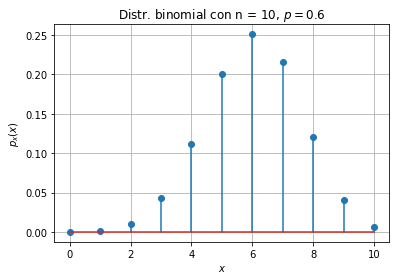

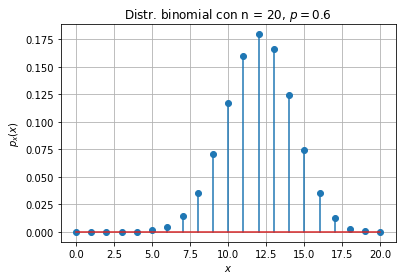

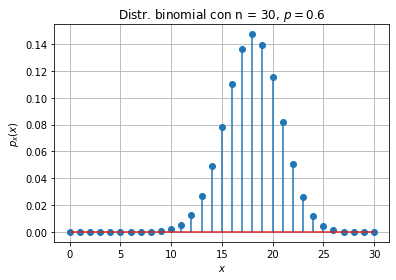

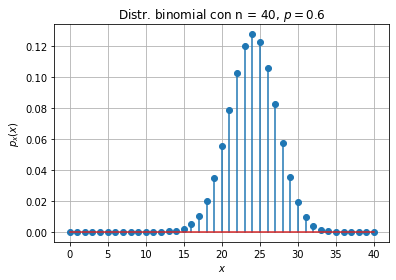

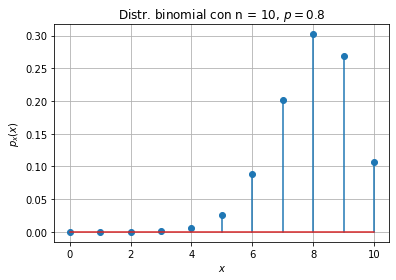

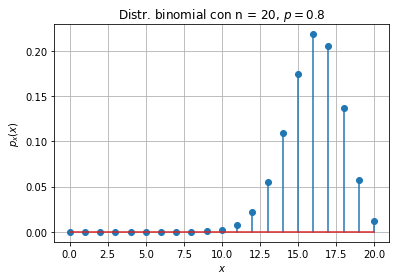

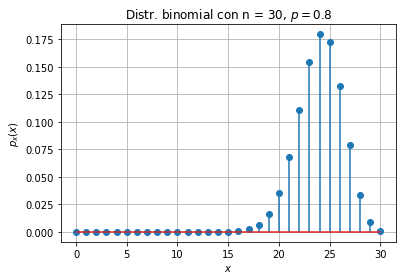

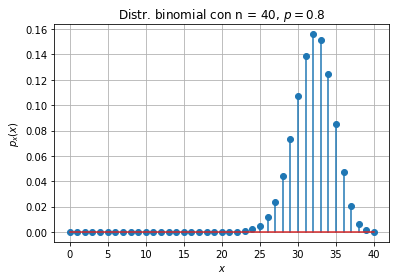

<Figure size 432x288 with 0 Axes>

In [6]:
# Gráfica de la variable aleatoria binomial
ks10 = []
for i in range(11):
    ks10.append(i)

ks20 = []
for i in range(21):
    ks20.append(i)

ks30 = []
for i in range(31):
    ks30.append(i)

ks40 = []
for i in range(41):
    ks40.append(i)

probs = [0.2, 0.4, 0.6, 0.8]
ns = [10, 20, 30, 40]

x_binom = []
for p in probs:
    for n in ns:
        if n == 10:
            plt.stem(ks10, binom(n, ks10, p))
            plt.grid()
            plt.title(r'Distr. binomial con' + f' n = {n}, ' + r'$p = $' + f'{p}')
            plt.xlabel(r'$x$')
            plt.ylabel(r'$p_x(x)$')
            plt.figure()
        elif n == 20:
            plt.stem(ks20, binom(n, ks20, p))
            plt.grid()
            plt.title(r'Distr. binomial con' + f' n = {n}, ' + r'$p = $' + f'{p}')
            plt.xlabel(r'$x$')
            plt.ylabel(r'$p_x(x)$')
            plt.figure()
        elif n == 30:
            plt.stem(ks30, binom(n, ks30, p))
            plt.grid()
            plt.title(r'Distr. binomial con' + f' n = {n}, ' + r'$p = $' + f'{p}')
            plt.xlabel(r'$x$')
            plt.ylabel(r'$p_x(x)$')
            plt.figure()
        elif n == 40:
            plt.stem(ks40, binom(n, ks40, p))
            plt.grid()
            plt.title(r'Distr. binomial con' + f' n = {n}, ' + r'$p = $' + f'{p}')
            plt.xlabel(r'$x$')
            plt.ylabel(r'$p_x(x)$')
            plt.figure()




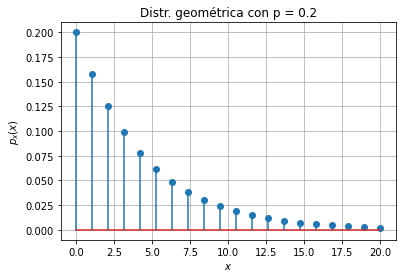

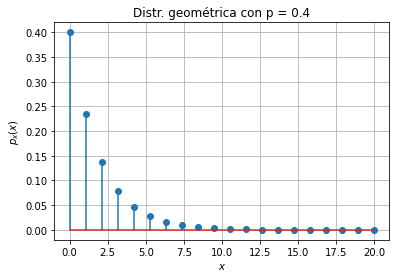

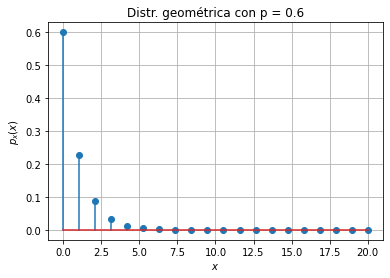

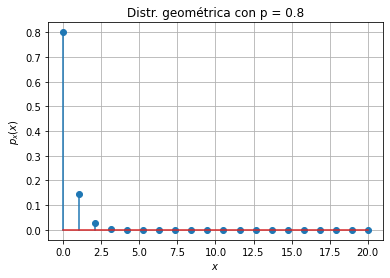

<Figure size 432x288 with 0 Axes>

In [7]:
# Graficas de la variable aleatoria geométrica
x = np.linspace(0, 20, num=20)
probs = [0.2, 0.4, 0.6, 0.8]

for p in probs:
    plt.stem(x, geom(p, x))
    plt.grid()
    plt.title(f'Distr. geométrica con p = {p}')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p_x(x)$')
    plt.figure()



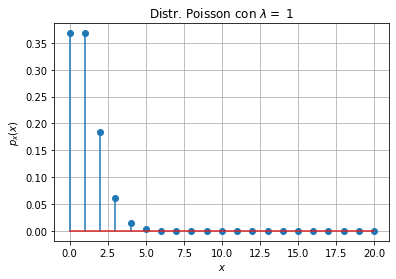

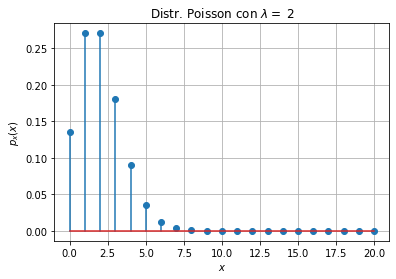

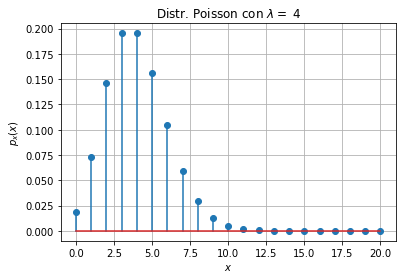

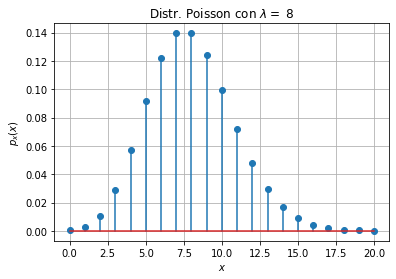

<Figure size 432x288 with 0 Axes>

In [8]:
# Gráficas de la distribución Poisson
ks = list(range(21))
lambdas = [1, 2, 4, 8]

for l in lambdas:
    plt.stem(ks, poisson(l, ks))
    plt.grid()
    plt.title(f'Distr. Poisson con ' + r'$\lambda = $ ' + f'{l}')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p_x(x)$')
    plt.figure()

## b)

El archivo **dataCaso2.txt** contiene los valores de una variable aleatoria para 10000 repeticiones de un experimento aleatorio. De esta variable aleatoria 
sólo se sabe que puede ser Uniforme, Geométrica o de Poisson. Utilizando estos datos, determine la frecuencia relativa de cada uno de los valores que esta
variable aleatoria toma. No puede utilizar funciones predeterminadas para calcular o graficar histogramas en este caso de estudio. Determine, a ojo, la función de masa de probabilidad que usted crea mejor se le ajustaría. En una figura, muestre las gráficas traslapadas de las frecuencias relativas y esa función de masa de probabilidad que usted sugiere es la que mejor se aproxima.

In [9]:
# Se exportan los datos del .txt
filename = 'dataCaso2.txt'
data = np.loadtxt(filename, delimiter='   ', skiprows=0, dtype=float)

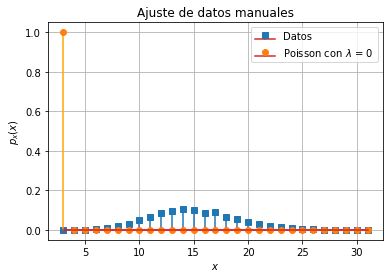

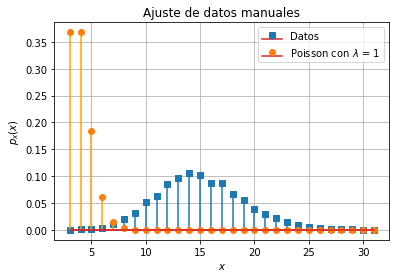

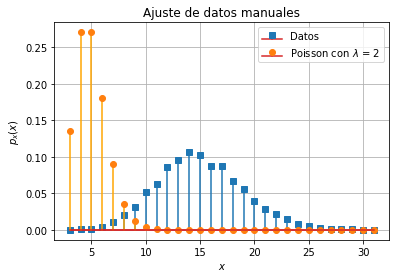

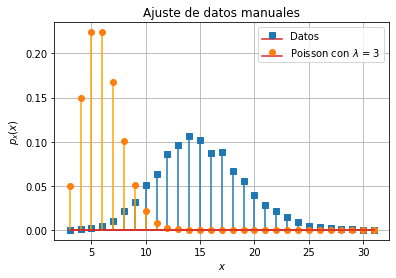

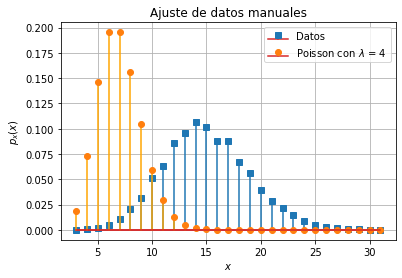

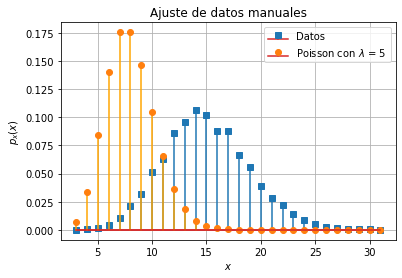

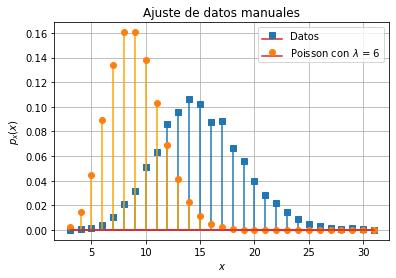

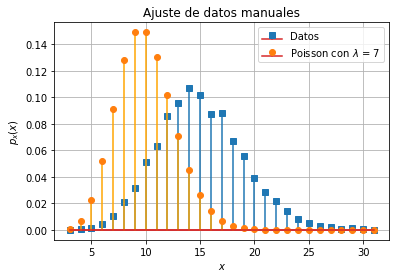

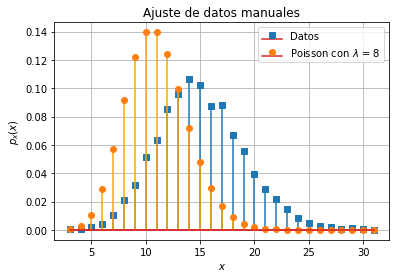

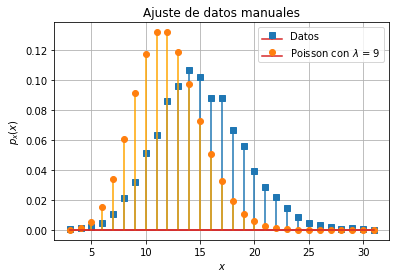

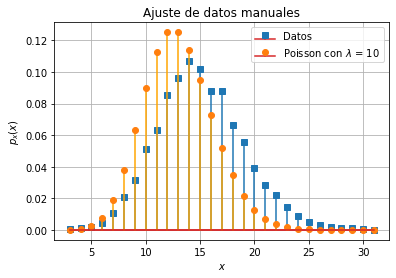

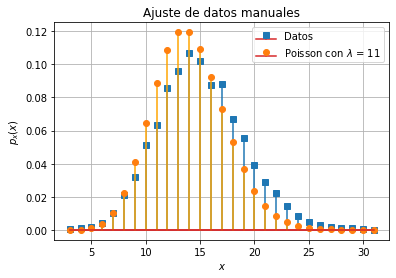

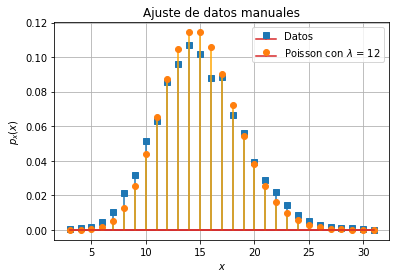

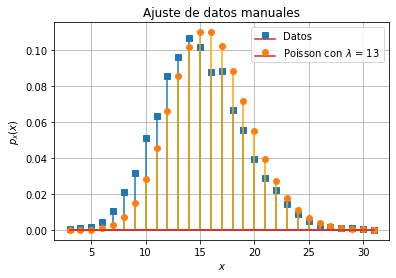

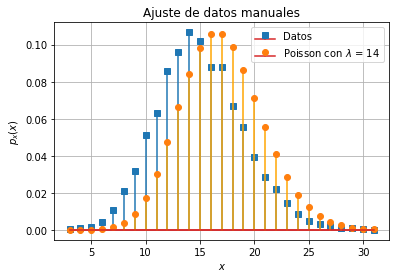

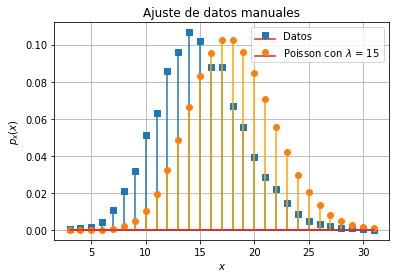

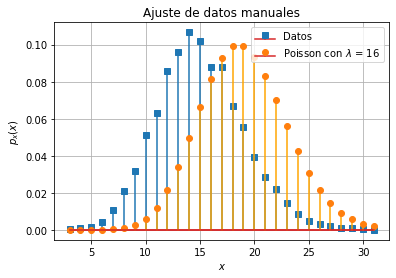

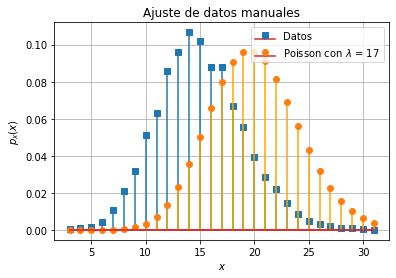

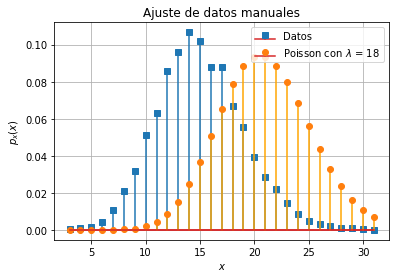

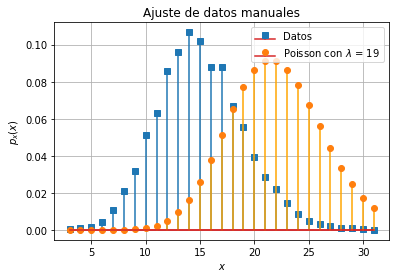

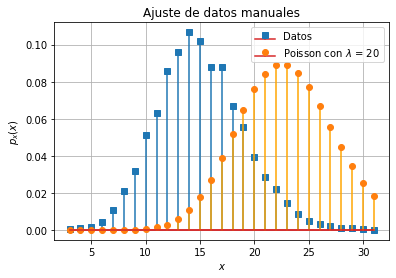

<Figure size 432x288 with 0 Axes>

In [10]:
# Volver la lista un set nos remueve los valores repetidos y nos deja cada valor solo una vez. Así sabemos qué valores únicos se encuentran dentro de la lista.
# Volvemos a convertir el set a una lista porque las listas son más cheveres.
unicos = list(set(data))

# Creamos una lista donde guardaremos las frecuencias de cada uno de los datos únicos.
frec = []

for unico in unicos:
    a = list(data).count(unico)
    frec.append(a/len(data))

for l in range(21):
    plt.stem(unicos, frec, markerfmt='s')
    plt.stem(unicos, poisson(l, unicos), markerfmt='o', linefmt='orange')
    plt.grid()
    plt.title(f'Ajuste de datos manuales')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p_x(x)$')
    plt.legend(['Datos', r'Poisson con $\lambda$ = '+ f'{l}'])
    plt.figure()